In [43]:
import pandas as pd
from scipy.stats import chisquare

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Calculated expectations here: http://localhost:8888/notebooks/Desktop/Staller_Lab/SFARI/notebooks/Common%20Variant%20Transition%20-%20Expectation%20.ipynb

In [2]:
# Loading in patient variants
from os import listdir
from os.path import isfile, join
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
TFs = [f for f in listdir("../soto_analysis/outputs/mutations/cds_bed_format/") if isfile(join("../soto_analysis/outputs/mutations/cds_bed_format/", f))]
TFs

['ENST00000359486',
 'ENST00000379044',
 'ENST00000437473',
 'ENST00000339562',
 'ENST00000348332',
 'ENST00000367265',
 'ENST00000342988',
 'ENST00000372583',
 'ENST00000262238',
 'ENST00000303329',
 'ENST00000315869',
 'ENST00000241001',
 'ENST00000348066',
 'ENST00000428368',
 'ENST00000318003',
 'ENST00000341099',
 'ENST00000056233',
 'ENST00000331340',
 'ENST00000356073',
 'ENST00000265340',
 'ENST00000377142',
 'ENST00000262518',
 'ENST00000239243',
 'ENST00000398919',
 'ENST00000373294',
 'ENST00000309446',
 'ENST00000561208',
 'ENST00000355995',
 'ENST00000395324',
 'ENST00000335670',
 'ENST00000312233',
 'ENST00000373036',
 'ENST00000434704',
 'ENST00000380013',
 'ENST00000355311',
 'ENST00000377022',
 'ENST00000250916',
 'ENST00000389506',
 'ENST00000246672',
 'ENST00000317216',
 'ENST00000403491',
 'ENST00000592199',
 'ENST00000358127',
 'ENST00000282549',
 'ENST00000264637']

In [3]:
# AD variants only
all_ad_var_dfs = []

for TF in TFs:
    ad_vars = pd.read_csv("../soto_analysis/outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/" + TF + ".bed", sep = "\t", header = None)
    all_ad_var_dfs.append(ad_vars)

In [4]:
all_ad_vars = pd.concat(all_ad_var_dfs)
all_ad_vars = all_ad_vars[all_ad_vars[3] == "AD"]
all_ad_vars = all_ad_vars[all_ad_vars[22] == "No-Syn"]
all_ad_vars

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
4,22,42214325,42214326,AD,ENSG00000100207,.,-,ENST00000359486,22,42214325,...,-,22,42214325,42214326,T,C,0.000014,H,R,No-Syn
5,22,42214327,42214328,AD,ENSG00000100207,.,-,ENST00000359486,22,42214327,...,-,22,42214327,42214328,C,G,0.000014,Q,H,No-Syn
6,22,42214329,42214330,AD,ENSG00000100207,.,-,ENST00000359486,22,42214329,...,-,22,42214329,42214330,G,C,0.000009,Q,E,No-Syn
7,22,42214335,42214336,AD,ENSG00000100207,.,-,ENST00000359486,22,42214335,...,-,22,42214335,42214336,G,A,0.000009,P,S,No-Syn
10,22,42214352,42214353,AD,ENSG00000100207,.,-,ENST00000359486,22,42214352,...,-,22,42214352,42214353,G,A,0.000037,P,L,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,17,40076878,40076879,AD,ENSG00000126351,.,+,ENST00000264637,17,40076878,...,+,17,40076878,40076879,C,T,0.000028,S,L,No-Syn
56,17,40076893,40076894,AD,ENSG00000126351,.,+,ENST00000264637,17,40076893,...,+,17,40076893,40076894,G,A,0.000019,R,Q,No-Syn
58,17,40076899,40076900,AD,ENSG00000126351,.,+,ENST00000264637,17,40076899,...,+,17,40076899,40076900,G,A,0.000023,R,K,No-Syn
59,17,40076910,40076911,AD,ENSG00000126351,.,+,ENST00000264637,17,40076910,...,+,17,40076910,40076911,C,G,0.000014,Q,E,No-Syn


In [5]:
orig_acidic = all_ad_vars[all_ad_vars[20].isin(["D", "E"])]
orig_acidic

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
137,22,42215042,42215043,AD,ENSG00000100207,.,-,ENST00000359486,22,42215042,...,-,22,42215042,42215043,T,C,0.000005,D,G,No-Syn
138,22,42215043,42215044,AD,ENSG00000100207,.,-,ENST00000359486,22,42215043,...,-,22,42215043,42215044,C,T,0.000028,D,N,No-Syn
187,22,42215218,42215219,AD,ENSG00000100207,.,-,ENST00000359486,22,42215218,...,-,22,42215218,42215219,C,G,0.000005,E,D,No-Syn
205,22,42215287,42215288,AD,ENSG00000100207,.,-,ENST00000359486,22,42215287,...,-,22,42215287,42215288,C,A,0.000009,E,D,No-Syn
137,5,88749097,88749098,AD,ENSG00000081189,.,-,ENST00000437473,5,88749097,...,-,5,88749097,88749098,G,T,0.000009,D,E,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2,63056193,63056194,AD,ENSG00000115507,.,+,ENST00000282549,2,63056193,...,+,2,63056193,63056194,G,A,0.000005,D,N,No-Syn
142,2,63056195,63056196,AD,ENSG00000115507,.,+,ENST00000282549,2,63056195,...,+,2,63056195,63056196,C,A,0.000005,D,E,No-Syn
143,2,63056202,63056203,AD,ENSG00000115507,.,+,ENST00000282549,2,63056202,...,+,2,63056202,63056203,G,A,0.000005,D,N,No-Syn
46,17,40074524,40074525,AD,ENSG00000126351,.,+,ENST00000264637,17,40074524,...,+,17,40074524,40074525,G,A,0.000009,D,N,No-Syn


In [6]:
orig_acidic[[20, 21]].value_counts()

20  21
E   K     59
D   N     46
    E     44
E   D     41
D   G     36
E   G     23
D   H     17
E   Q     17
    V     14
    A     13
D   Y     12
    V     10
    A      2
Name: count, dtype: int64

In [7]:
orig_E = all_ad_vars[all_ad_vars[20].isin(["E"])]
orig_E

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
187,22,42215218,42215219,AD,ENSG00000100207,.,-,ENST00000359486,22,42215218,...,-,22,42215218,42215219,C,G,0.000005,E,D,No-Syn
205,22,42215287,42215288,AD,ENSG00000100207,.,-,ENST00000359486,22,42215287,...,-,22,42215287,42215288,C,A,0.000009,E,D,No-Syn
176,5,88761222,88761223,AD,ENSG00000081189,.,-,ENST00000437473,5,88761222,...,-,5,88761222,88761223,C,T,0.000009,E,K,No-Syn
165,2,24728332,24728333,AD,ENSG00000084676,.,+,ENST00000348332,2,24728332,...,+,2,24728332,24728333,G,A,0.000028,E,K,No-Syn
166,2,24728333,24728334,AD,ENSG00000084676,.,+,ENST00000348332,2,24728333,...,+,2,24728333,24728334,A,T,0.000005,E,V,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,10665394,10665395,AD,ENSG00000130940,.,-,ENST00000377022,1,10665394,...,-,1,10665394,10665395,C,T,0.000005,E,K,No-Syn
117,1,10665423,10665424,AD,ENSG00000130940,.,-,ENST00000377022,1,10665423,...,-,1,10665423,10665424,T,A,0.000047,E,V,No-Syn
118,1,10665424,10665425,AD,ENSG00000130940,.,-,ENST00000377022,1,10665424,...,-,1,10665424,10665425,C,T,0.000014,E,K,No-Syn
127,8,22692865,22692866,AD,ENSG00000179388,.,-,ENST00000317216,8,22692865,...,-,8,22692865,22692866,C,T,0.000005,E,K,No-Syn


In [8]:
orig_E[[20, 21]].value_counts()

20  21
E   K     59
    D     41
    G     23
    Q     17
    V     14
    A     13
Name: count, dtype: int64

In [9]:
orig_D = all_ad_vars[all_ad_vars[20].isin(["D"])]
orig_D

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
137,22,42215042,42215043,AD,ENSG00000100207,.,-,ENST00000359486,22,42215042,...,-,22,42215042,42215043,T,C,0.000005,D,G,No-Syn
138,22,42215043,42215044,AD,ENSG00000100207,.,-,ENST00000359486,22,42215043,...,-,22,42215043,42215044,C,T,0.000028,D,N,No-Syn
137,5,88749097,88749098,AD,ENSG00000081189,.,-,ENST00000437473,5,88749097,...,-,5,88749097,88749098,G,T,0.000009,D,E,No-Syn
175,5,88761218,88761219,AD,ENSG00000081189,.,-,ENST00000437473,5,88761218,...,-,5,88761218,88761219,T,A,0.000005,D,V,No-Syn
37,2,156329970,156329971,AD,ENSG00000153234,.,-,ENST00000339562,2,156329970,...,-,2,156329970,156329971,G,T,0.000005,D,E,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,63055989,63055990,AD,ENSG00000115507,.,+,ENST00000282549,2,63055989,...,+,2,63055989,63055990,G,C,0.000005,D,H,No-Syn
141,2,63056193,63056194,AD,ENSG00000115507,.,+,ENST00000282549,2,63056193,...,+,2,63056193,63056194,G,A,0.000005,D,N,No-Syn
142,2,63056195,63056196,AD,ENSG00000115507,.,+,ENST00000282549,2,63056195,...,+,2,63056195,63056196,C,A,0.000005,D,E,No-Syn
143,2,63056202,63056203,AD,ENSG00000115507,.,+,ENST00000282549,2,63056202,...,+,2,63056202,63056203,G,A,0.000005,D,N,No-Syn


In [10]:
orig_D[[20, 21]].value_counts()

20  21
D   N     46
    E     44
    G     36
    H     17
    Y     12
    V     10
    A      2
Name: count, dtype: int64

In [11]:
expec_df = pd.read_csv("../data/residue_change_expec.csv", index_col = 0)
expec_df = expec_df.rename(columns = {"orig_AA" : "orig", "new_AA" : "var"})
expec_df

,orig,var,paths,exp_freq
0,F,I,2,0.125000
1,F,V,2,0.125000
2,F,L,6,0.375000
3,F,Y,2,0.125000
4,F,C,2,0.125000
...,...,...,...,...
3,K,I,1,0.071429
4,K,R,2,0.142857
5,K,T,2,0.142857
6,K,N,4,0.285714


In [30]:
def return_obs_transition_freq(residue):
    expec = expec_df[expec_df["orig"] == residue]
    
    orig_resid = all_ad_vars[all_ad_vars[20].isin([residue])]
    return_df = pd.DataFrame(orig_resid[[20, 21]].value_counts()).reset_index()
    return_df = return_df.rename(columns = {20 : "orig", 21 : "var", 0: "obs"})
    
    return_df = pd.merge(return_df, expec, how = "right")

    return_df = return_df.fillna(0)
    return_df["exp"] = return_df["exp_freq"] * sum(return_df["count"])

    display(return_df)


        
    p_val = chisquare(f_obs=return_df["count"], f_exp=return_df["exp"]).pvalue
    print(p_val)
    display(return_df)


    return p_val, return_df

In [31]:
aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [32]:
p_vals = []
results_df = []

for aa in aa_codes:
    print(aa)
    output = return_obs_transition_freq(aa)
    p_vals.append(output[0])
    results_df.append(output[1])

A


,orig,var,count,paths,exp_freq,exp
0,A,T,101,4,0.166667,44.0
1,A,S,38,4,0.166667,44.0
2,A,P,21,4,0.166667,44.0
3,A,D,9,2,0.083333,22.0
4,A,V,70,4,0.166667,44.0
5,A,G,22,4,0.166667,44.0
6,A,E,3,2,0.083333,22.0


4.028079549622748e-27


,orig,var,count,paths,exp_freq,exp
0,A,T,101,4,0.166667,44.0
1,A,S,38,4,0.166667,44.0
2,A,P,21,4,0.166667,44.0
3,A,D,9,2,0.083333,22.0
4,A,V,70,4,0.166667,44.0
5,A,G,22,4,0.166667,44.0
6,A,E,3,2,0.083333,22.0


C


,orig,var,count,paths,exp_freq,exp
0,C,S,10,4,0.285714,6.857143
1,C,G,1,2,0.142857,3.428571
2,C,R,2,2,0.142857,3.428571
3,C,Y,9,2,0.142857,3.428571
4,C,F,1,2,0.142857,3.428571
5,C,W,1,2,0.142857,3.428571


0.0061654019348308204


,orig,var,count,paths,exp_freq,exp
0,C,S,10,4,0.285714,6.857143
1,C,G,1,2,0.142857,3.428571
2,C,R,2,2,0.142857,3.428571
3,C,Y,9,2,0.142857,3.428571
4,C,F,1,2,0.142857,3.428571
5,C,W,1,2,0.142857,3.428571


D


,orig,var,count,paths,exp_freq,exp
0,D,N,46,2,0.125,20.875
1,D,Y,12,2,0.125,20.875
2,D,H,17,2,0.125,20.875
3,D,V,10,2,0.125,20.875
4,D,G,36,2,0.125,20.875
5,D,A,2,2,0.125,20.875
6,D,E,44,4,0.250,41.750


8.125539129116708e-13


,orig,var,count,paths,exp_freq,exp
0,D,N,46,2,0.125,20.875
1,D,Y,12,2,0.125,20.875
2,D,H,17,2,0.125,20.875
3,D,V,10,2,0.125,20.875
4,D,G,36,2,0.125,20.875
5,D,A,2,2,0.125,20.875
6,D,E,44,4,0.250,41.750


E


,orig,var,count,paths,exp_freq,exp
0,E,K,59,2,0.142857,23.857143
1,E,Q,17,2,0.142857,23.857143
2,E,V,14,2,0.142857,23.857143
3,E,G,23,2,0.142857,23.857143
4,E,A,13,2,0.142857,23.857143
5,E,D,41,4,0.285714,47.714286


2.0574471286889083e-12


,orig,var,count,paths,exp_freq,exp
0,E,K,59,2,0.142857,23.857143
1,E,Q,17,2,0.142857,23.857143
2,E,V,14,2,0.142857,23.857143
3,E,G,23,2,0.142857,23.857143
4,E,A,13,2,0.142857,23.857143
5,E,D,41,4,0.285714,47.714286


F


,orig,var,count,paths,exp_freq,exp
0,F,I,3,2,0.125,3.25
1,F,V,1,2,0.125,3.25
2,F,L,12,6,0.375,9.75
3,F,Y,2,2,0.125,3.25
4,F,C,4,2,0.125,3.25
5,F,S,4,2,0.125,3.25


0.7118438867820834


,orig,var,count,paths,exp_freq,exp
0,F,I,3,2,0.125,3.25
1,F,V,1,2,0.125,3.25
2,F,L,12,6,0.375,9.75
3,F,Y,2,2,0.125,3.25
4,F,C,4,2,0.125,3.25
5,F,S,4,2,0.125,3.25


G


,orig,var,count,paths,exp_freq,exp
0,G,R,64,6,0.260870,62.869565
1,G,E,20,2,0.086957,20.956522
2,G,V,24,4,0.173913,41.913043
3,G,A,24,4,0.173913,41.913043
4,G,S,62,2,0.086957,20.956522
5,G,C,16,2,0.086957,20.956522
6,G,D,28,2,0.086957,20.956522
7,G,W,3,1,0.043478,10.478261


1.1869395326211943e-19


,orig,var,count,paths,exp_freq,exp
0,G,R,64,6,0.260870,62.869565
1,G,E,20,2,0.086957,20.956522
2,G,V,24,4,0.173913,41.913043
3,G,A,24,4,0.173913,41.913043
4,G,S,62,2,0.086957,20.956522
5,G,C,16,2,0.086957,20.956522
6,G,D,28,2,0.086957,20.956522
7,G,W,3,1,0.043478,10.478261


H


,orig,var,count,paths,exp_freq,exp
0,H,N,8,2,0.125,11.25
1,H,Y,24,2,0.125,11.25
2,H,D,3,2,0.125,11.25
3,H,L,2,2,0.125,11.25
4,H,R,25,2,0.125,11.25
5,H,P,8,2,0.125,11.25
6,H,Q,20,4,0.250,22.50


1.8147101790487257e-08


,orig,var,count,paths,exp_freq,exp
0,H,N,8,2,0.125,11.25
1,H,Y,24,2,0.125,11.25
2,H,D,3,2,0.125,11.25
3,H,L,2,2,0.125,11.25
4,H,R,25,2,0.125,11.25
5,H,P,8,2,0.125,11.25
6,H,Q,20,4,0.250,22.50


I


,orig,var,count,paths,exp_freq,exp
0,I,L,11.0,4,0.190476,19.238095
1,I,V,39.0,3,0.142857,14.428571
2,I,K,3.0,1,0.047619,4.809524
3,I,R,0.0,1,0.047619,4.809524
4,I,T,22.0,3,0.142857,14.428571
5,I,M,10.0,3,0.142857,14.428571
6,I,F,8.0,2,0.095238,9.619048
7,I,N,5.0,2,0.095238,9.619048
8,I,S,3.0,2,0.095238,9.619048


1.0743288700095095e-10


,orig,var,count,paths,exp_freq,exp
0,I,L,11.0,4,0.190476,19.238095
1,I,V,39.0,3,0.142857,14.428571
2,I,K,3.0,1,0.047619,4.809524
3,I,R,0.0,1,0.047619,4.809524
4,I,T,22.0,3,0.142857,14.428571
5,I,M,10.0,3,0.142857,14.428571
6,I,F,8.0,2,0.095238,9.619048
7,I,N,5.0,2,0.095238,9.619048
8,I,S,3.0,2,0.095238,9.619048


K


,orig,var,count,paths,exp_freq,exp
0,K,E,12.0,2,0.142857,5.285714
1,K,Q,5.0,2,0.142857,5.285714
2,K,I,0.0,1,0.071429,2.642857
3,K,R,13.0,2,0.142857,5.285714
4,K,T,2.0,2,0.142857,5.285714
5,K,N,2.0,4,0.285714,10.571429
6,K,M,3.0,1,0.071429,2.642857


2.0464066805289164e-05


,orig,var,count,paths,exp_freq,exp
0,K,E,12.0,2,0.142857,5.285714
1,K,Q,5.0,2,0.142857,5.285714
2,K,I,0.0,1,0.071429,2.642857
3,K,R,13.0,2,0.142857,5.285714
4,K,T,2.0,2,0.142857,5.285714
5,K,N,2.0,4,0.285714,10.571429
6,K,M,3.0,1,0.071429,2.642857


L


,orig,var,count,paths,exp_freq,exp
0,L,M,11,2,0.060606,8.848485
1,L,V,34,6,0.181818,26.545455
2,L,W,4,1,0.030303,4.424242
3,L,S,8,2,0.060606,8.848485
4,L,F,37,6,0.181818,26.545455
5,L,I,13,4,0.121212,17.696970
6,L,H,5,2,0.060606,8.848485
7,L,R,11,4,0.121212,17.696970
8,L,P,19,4,0.121212,17.696970
9,L,Q,4,2,0.060606,8.848485


0.08921032778425456


,orig,var,count,paths,exp_freq,exp
0,L,M,11,2,0.060606,8.848485
1,L,V,34,6,0.181818,26.545455
2,L,W,4,1,0.030303,4.424242
3,L,S,8,2,0.060606,8.848485
4,L,F,37,6,0.181818,26.545455
5,L,I,13,4,0.121212,17.696970
6,L,H,5,2,0.060606,8.848485
7,L,R,11,4,0.121212,17.696970
8,L,P,19,4,0.121212,17.696970
9,L,Q,4,2,0.060606,8.848485


M


,orig,var,count,paths,exp_freq,exp
0,M,L,21,2,0.222222,29.777778
1,M,V,40,1,0.111111,14.888889
2,M,K,4,1,0.111111,14.888889
3,M,R,5,1,0.111111,14.888889
4,M,T,24,1,0.111111,14.888889
5,M,I,40,3,0.333333,44.666667


8.685671772946032e-13


,orig,var,count,paths,exp_freq,exp
0,M,L,21,2,0.222222,29.777778
1,M,V,40,1,0.111111,14.888889
2,M,K,4,1,0.111111,14.888889
3,M,R,5,1,0.111111,14.888889
4,M,T,24,1,0.111111,14.888889
5,M,I,40,3,0.333333,44.666667


N


,orig,var,count,paths,exp_freq,exp
0,N,Y,6,2,0.125,15.625
1,N,D,20,2,0.125,15.625
2,N,H,12,2,0.125,15.625
3,N,I,4,2,0.125,15.625
4,N,S,57,2,0.125,15.625
5,N,T,8,2,0.125,15.625
6,N,K,18,4,0.250,31.250


8.727291882642854e-27


,orig,var,count,paths,exp_freq,exp
0,N,Y,6,2,0.125,15.625
1,N,D,20,2,0.125,15.625
2,N,H,12,2,0.125,15.625
3,N,I,4,2,0.125,15.625
4,N,S,57,2,0.125,15.625
5,N,T,8,2,0.125,15.625
6,N,K,18,4,0.250,31.250


P


,orig,var,count,paths,exp_freq,exp
0,P,T,46,4,0.166667,76.166667
1,P,S,128,4,0.166667,76.166667
2,P,A,55,4,0.166667,76.166667
3,P,H,21,2,0.083333,38.083333
4,P,L,145,4,0.166667,76.166667
5,P,R,43,4,0.166667,76.166667
6,P,Q,19,2,0.083333,38.083333


3.367754350190035e-29


,orig,var,count,paths,exp_freq,exp
0,P,T,46,4,0.166667,76.166667
1,P,S,128,4,0.166667,76.166667
2,P,A,55,4,0.166667,76.166667
3,P,H,21,2,0.083333,38.083333
4,P,L,145,4,0.166667,76.166667
5,P,R,43,4,0.166667,76.166667
6,P,Q,19,2,0.083333,38.083333


Q


,orig,var,count,paths,exp_freq,exp
0,Q,K,10,2,0.142857,19.428571
1,Q,E,26,2,0.142857,19.428571
2,Q,L,14,2,0.142857,19.428571
3,Q,R,38,2,0.142857,19.428571
4,Q,P,16,2,0.142857,19.428571
5,Q,H,32,4,0.285714,38.857143


3.837772658896878e-05


,orig,var,count,paths,exp_freq,exp
0,Q,K,10,2,0.142857,19.428571
1,Q,E,26,2,0.142857,19.428571
2,Q,L,14,2,0.142857,19.428571
3,Q,R,38,2,0.142857,19.428571
4,Q,P,16,2,0.142857,19.428571
5,Q,H,32,4,0.285714,38.857143


R


,orig,var,count,paths,exp_freq,exp
0,R,S,8.0,6,0.176471,60.352941
1,R,C,58.0,2,0.058824,20.117647
2,R,G,27.0,6,0.176471,60.352941
3,R,H,61.0,2,0.058824,20.117647
4,R,L,18.0,4,0.117647,40.235294
5,R,P,10.0,4,0.117647,40.235294
6,R,W,46.0,2,0.058824,20.117647
7,R,Q,85.0,2,0.058824,20.117647
8,R,K,18.0,2,0.058824,20.117647
9,R,M,0.0,1,0.029412,10.058824


3.990220012381523e-104


,orig,var,count,paths,exp_freq,exp
0,R,S,8.0,6,0.176471,60.352941
1,R,C,58.0,2,0.058824,20.117647
2,R,G,27.0,6,0.176471,60.352941
3,R,H,61.0,2,0.058824,20.117647
4,R,L,18.0,4,0.117647,40.235294
5,R,P,10.0,4,0.117647,40.235294
6,R,W,46.0,2,0.058824,20.117647
7,R,Q,85.0,2,0.058824,20.117647
8,R,K,18.0,2,0.058824,20.117647
9,R,M,0.0,1,0.029412,10.058824


S


,orig,var,count,paths,exp_freq,exp
0,S,T,30,6,0.162162,51.243243
1,S,A,26,4,0.108108,34.162162
2,S,P,33,4,0.108108,34.162162
3,S,Y,14,2,0.054054,17.081081
4,S,F,29,2,0.054054,17.081081
5,S,C,27,4,0.108108,34.162162
6,S,L,41,2,0.054054,17.081081
7,S,W,3,1,0.027027,8.540541
8,S,G,37,2,0.054054,17.081081
9,S,R,29,6,0.162162,51.243243


6.306966527893917e-20


,orig,var,count,paths,exp_freq,exp
0,S,T,30,6,0.162162,51.243243
1,S,A,26,4,0.108108,34.162162
2,S,P,33,4,0.108108,34.162162
3,S,Y,14,2,0.054054,17.081081
4,S,F,29,2,0.054054,17.081081
5,S,C,27,4,0.108108,34.162162
6,S,L,41,2,0.054054,17.081081
7,S,W,3,1,0.027027,8.540541
8,S,G,37,2,0.054054,17.081081
9,S,R,29,6,0.162162,51.243243


T


,orig,var,count,paths,exp_freq,exp
0,T,S,28,6,0.250000,50.250
1,T,A,58,4,0.166667,33.500
2,T,P,12,4,0.166667,33.500
3,T,K,10,2,0.083333,16.750
4,T,I,47,3,0.125000,25.125
5,T,R,5,2,0.083333,16.750
6,T,N,13,2,0.083333,16.750
7,T,M,28,1,0.041667,8.375


1.6473514634689236e-22


,orig,var,count,paths,exp_freq,exp
0,T,S,28,6,0.250000,50.250
1,T,A,58,4,0.166667,33.500
2,T,P,12,4,0.166667,33.500
3,T,K,10,2,0.083333,16.750
4,T,I,47,3,0.125000,25.125
5,T,R,5,2,0.083333,16.750
6,T,N,13,2,0.083333,16.750
7,T,M,28,1,0.041667,8.375


V


,orig,var,count,paths,exp_freq,exp
0,V,M,39,1,0.041667,6.5
1,V,L,28,6,0.250000,39.0
2,V,E,1,2,0.083333,13.0
3,V,G,9,4,0.166667,26.0
4,V,A,30,4,0.166667,26.0
5,V,I,40,3,0.125000,19.5
6,V,F,8,2,0.083333,13.0
7,V,D,1,2,0.083333,13.0


1.5513190213298455e-44


,orig,var,count,paths,exp_freq,exp
0,V,M,39,1,0.041667,6.5
1,V,L,28,6,0.250000,39.0
2,V,E,1,2,0.083333,13.0
3,V,G,9,4,0.166667,26.0
4,V,A,30,4,0.166667,26.0
5,V,I,40,3,0.125000,19.5
6,V,F,8,2,0.083333,13.0
7,V,D,1,2,0.083333,13.0


W


,orig,var,count,paths,exp_freq,exp
0,W,R,1.0,2,0.285714,1.142857
1,W,G,1.0,1,0.142857,0.571429
2,W,L,0.0,1,0.142857,0.571429
3,W,S,0.0,1,0.142857,0.571429
4,W,C,2.0,2,0.285714,1.142857


0.7127809271900101


,orig,var,count,paths,exp_freq,exp
0,W,R,1.0,2,0.285714,1.142857
1,W,G,1.0,1,0.142857,0.571429
2,W,L,0.0,1,0.142857,0.571429
3,W,S,0.0,1,0.142857,0.571429
4,W,C,2.0,2,0.285714,1.142857


Y


,orig,var,count,paths,exp_freq,exp
0,Y,N,4,2,0.166667,9.166667
1,Y,D,1,2,0.166667,9.166667
2,Y,H,12,2,0.166667,9.166667
3,Y,F,5,2,0.166667,9.166667
4,Y,C,29,2,0.166667,9.166667
5,Y,S,4,2,0.166667,9.166667


2.1694226117470525e-11


,orig,var,count,paths,exp_freq,exp
0,Y,N,4,2,0.166667,9.166667
1,Y,D,1,2,0.166667,9.166667
2,Y,H,12,2,0.166667,9.166667
3,Y,F,5,2,0.166667,9.166667
4,Y,C,29,2,0.166667,9.166667
5,Y,S,4,2,0.166667,9.166667


In [33]:
chi_sq_p_vals = pd.DataFrame({"orig_aa" : aa_codes, "p_val" : p_vals})
chi_sq_p_vals

,orig_aa,p_val
0,A,4.028080e-27
1,C,6.165402e-03
2,D,8.125539e-13
3,E,2.057447e-12
4,F,7.118439e-01
5,G,1.186940e-19
6,H,1.814710e-08
7,I,1.074329e-10
8,K,2.046407e-05
9,L,8.921033e-02


In [34]:
multip_hyp_correc = chi_sq_p_vals[chi_sq_p_vals["p_val"] < 0.01 / 20]
multip_hyp_correc

,orig_aa,p_val
0,A,4.028080e-27
2,D,8.125539e-13
3,E,2.057447e-12
5,G,1.186940e-19
6,H,1.814710e-08
7,I,1.074329e-10
8,K,2.046407e-05
10,M,8.685672e-13
11,N,8.727292e-27
12,P,3.367754e-29


In [78]:
import statsmodels as sm

chi_sq_p_vals["ben_hoch"] = sm.stats.multitest.fdrcorrection(chi_sq_p_vals["p_val"], alpha=0.05, method='indep', is_sorted=False)[0]
chi_sq_p_vals

,orig_aa,p_val,ben_hoch
0,A,4.028080e-27,True
1,C,6.165402e-03,True
2,D,8.125539e-13,True
3,E,2.057447e-12,True
4,F,7.118439e-01,False
5,G,1.186940e-19,True
6,H,1.814710e-08,True
7,I,1.074329e-10,True
8,K,2.046407e-05,True
9,L,8.921033e-02,False


In [79]:
chi_sq_p_vals[chi_sq_p_vals["ben_hoch"]]

,orig_aa,p_val,ben_hoch
0,A,4.028080e-27,True
1,C,6.165402e-03,True
2,D,8.125539e-13,True
3,E,2.057447e-12,True
5,G,1.186940e-19,True
6,H,1.814710e-08,True
7,I,1.074329e-10,True
8,K,2.046407e-05,True
10,M,8.685672e-13,True
11,N,8.727292e-27,True


In [81]:
chi_sq_p_vals[~chi_sq_p_vals["ben_hoch"]]

,orig_aa,p_val,ben_hoch
4,F,0.711844,False
9,L,0.089210,False
18,W,0.712781,False


In [35]:
set(aa_codes) - set(multip_hyp_correc["orig_aa"])

{'C', 'F', 'L', 'W'}

In [35]:
set(aa_codes) - set(multip_hyp_correc["orig_aa"])

{'C', 'F', 'L', 'W'}

In [35]:
set(aa_codes) - set(multip_hyp_correc["orig_aa"])

{'C', 'F', 'L', 'W'}

In [37]:
results_df = pd.concat(results_df)
results_df

,orig,var,count,paths,exp_freq,exp
0,A,T,101.0,4,0.166667,44.000000
1,A,S,38.0,4,0.166667,44.000000
2,A,P,21.0,4,0.166667,44.000000
3,A,D,9.0,2,0.083333,22.000000
4,A,V,70.0,4,0.166667,44.000000
...,...,...,...,...,...,...
1,Y,D,1.0,2,0.166667,9.166667
2,Y,H,12.0,2,0.166667,9.166667
3,Y,F,5.0,2,0.166667,9.166667
4,Y,C,29.0,2,0.166667,9.166667


In [38]:
results_df["obs/exp"] = results_df["count"] / results_df["exp"]
results_df

,orig,var,count,paths,exp_freq,exp,obs/exp
0,A,T,101.0,4,0.166667,44.000000,2.295455
1,A,S,38.0,4,0.166667,44.000000,0.863636
2,A,P,21.0,4,0.166667,44.000000,0.477273
3,A,D,9.0,2,0.083333,22.000000,0.409091
4,A,V,70.0,4,0.166667,44.000000,1.590909
...,...,...,...,...,...,...,...
1,Y,D,1.0,2,0.166667,9.166667,0.109091
2,Y,H,12.0,2,0.166667,9.166667,1.309091
3,Y,F,5.0,2,0.166667,9.166667,0.545455
4,Y,C,29.0,2,0.166667,9.166667,3.163636


In [40]:
pivot_results_df = pd.pivot(results_df, values = "obs/exp", index = "var", columns = "orig")
pivot_results_df

orig,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
var,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,0.095808,0.544910,NaN,0.572614,NaN,NaN,NaN,NaN,NaN,NaN,0.722101,NaN,NaN,0.761076,1.731343,1.153846,NaN,NaN
C,NaN,NaN,NaN,NaN,1.230769,0.763485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.883041,0.790348,NaN,NaN,1.750,3.163636
D,0.409091,NaN,NaN,0.859281,NaN,1.336100,0.266667,NaN,NaN,NaN,NaN,1.280,NaN,NaN,NaN,NaN,NaN,0.076923,NaN,0.109091
E,0.136364,NaN,1.053892,NaN,NaN,0.954357,NaN,NaN,2.270270,NaN,NaN,NaN,NaN,1.338235,NaN,NaN,NaN,0.076923,NaN,NaN
F,NaN,0.291667,NaN,NaN,NaN,NaN,NaN,0.831683,NaN,1.393836,NaN,NaN,NaN,NaN,NaN,1.697785,NaN,0.615385,NaN,0.545455
G,0.500000,0.291667,1.724551,0.964072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447368,2.166139,NaN,0.346154,1.750,NaN
H,NaN,NaN,0.814371,NaN,NaN,NaN,NaN,NaN,NaN,0.565068,NaN,0.768,0.551422,0.823529,3.032164,NaN,NaN,NaN,NaN,1.309091
I,NaN,NaN,NaN,NaN,0.923077,NaN,NaN,NaN,0.000000,0.734589,0.895522,0.256,NaN,NaN,0.397661,0.585443,1.870647,2.051282,NaN,NaN
K,NaN,NaN,NaN,2.473054,NaN,NaN,NaN,0.623762,NaN,NaN,0.268657,0.576,NaN,0.514706,0.894737,NaN,0.597015,NaN,NaN,NaN


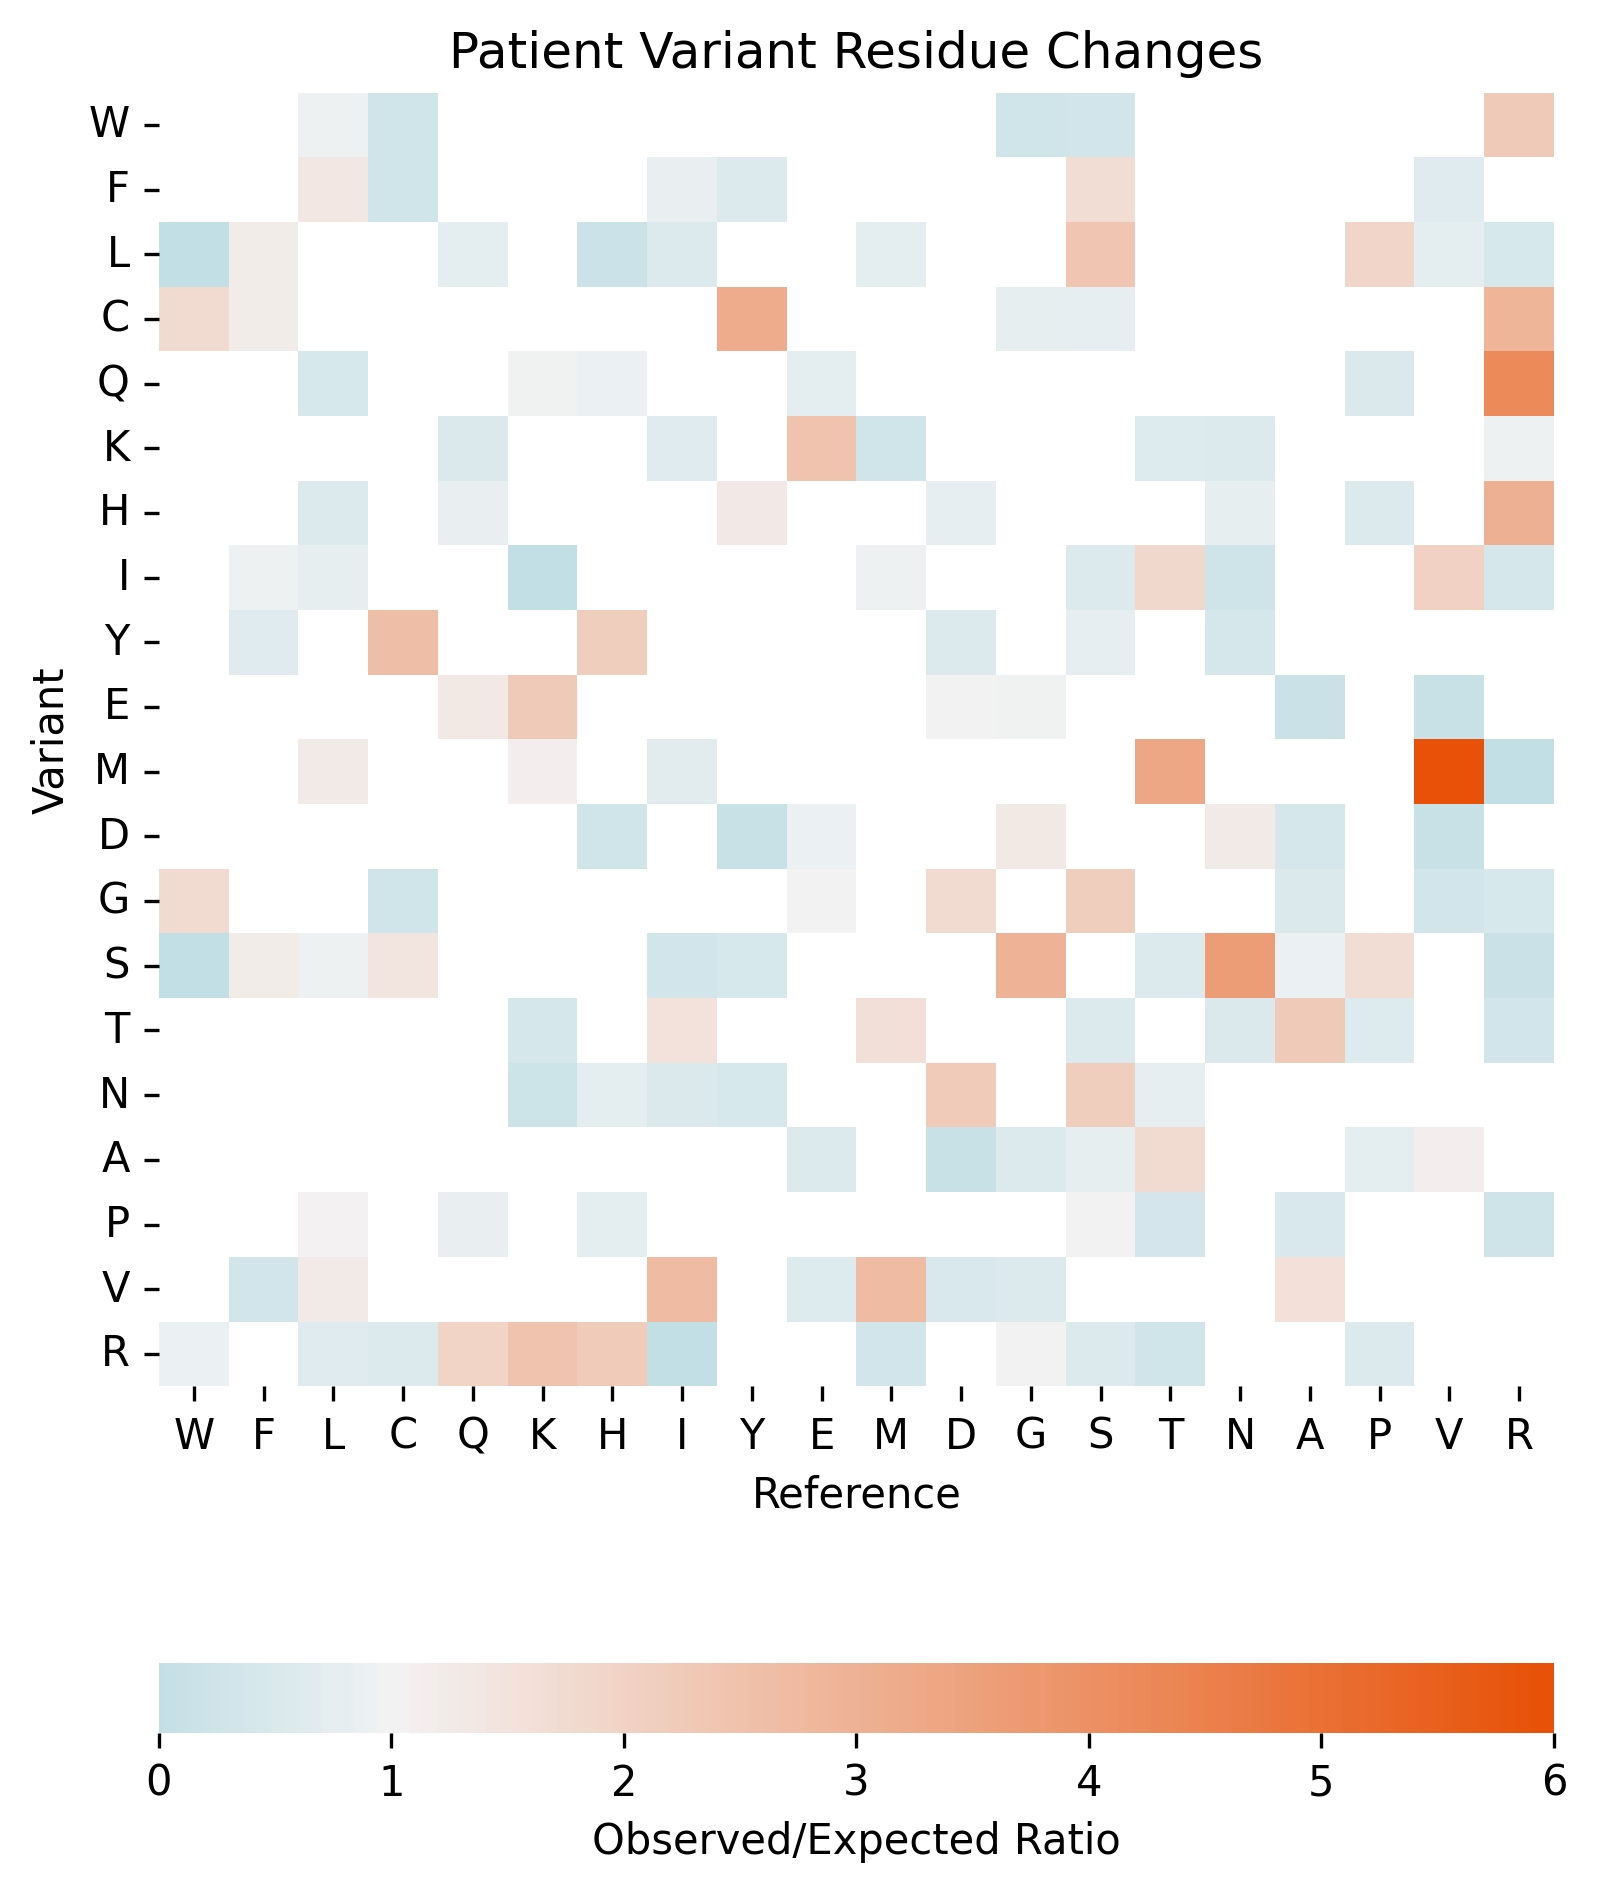

In [90]:
AA_order = chi_sq_p_vals.sort_values(by = "p_val", ascending = False)["orig_aa"]

pivot_results_df = pivot_results_df.reindex(AA_order, axis = 0)
pivot_results_df = pivot_results_df.reindex(AA_order, axis = 1)

fig, ax = plt.subplots(figsize=(6, 8), dpi = 300)

rdgn = sns.diverging_palette(h_neg=220, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(pivot_results_df, ax = ax, cmap = rdgn, center = 1, cbar_kws = dict(location="bottom", label = "Observed/Expected Ratio"))
plt.yticks(rotation = 0)

plt.title("Patient Variant Residue Changes");
plt.xlabel("Reference")
plt.ylabel("Variant");

In [91]:
results_df.to_csv("../output/patient_variant_residue_transition_count.csv")